# Assignment 2 (K mean+ Aglomerative + Purity + DBSCAN)


## Assignment instructions

1. Carefully read and follow all instructions.
2. No Late submisison Would be Accepted
3. You can search the basics of python, concepts, and syntax online. Copy solution from internet would result into 0.
4. Do keep in mind that sharing the code, discussing it is highly unethical, and all actions would be considered as plagiarism.
5. Plagiarism will result in serious penalty
6. I'll eveluate on the basis of resultant as you guys are using built in functions. 
7. keep code clean and precise, its part of your assignment grading. Doing a hectic code would result in -ve marking

###### Instruction - rename this file as rollnumber_ass2; for example
###### 20l-1212_ass2

In [371]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import math

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


# Task1: 
You need to create blobs with onlt 2 dimentions. 

Number of nodes equal to your roll number

#### eg: 20l-1212= 1212 nodes

All of you understood the code of blob and circle that have been demonstrated in labs 

Manipulate the value in that code and regenerate 5 datasets, such those datsets are near approximation of below images

## NOTE : The outputs fields are also shared.

##### Dataset 1
![img1.PNG](img1.png)
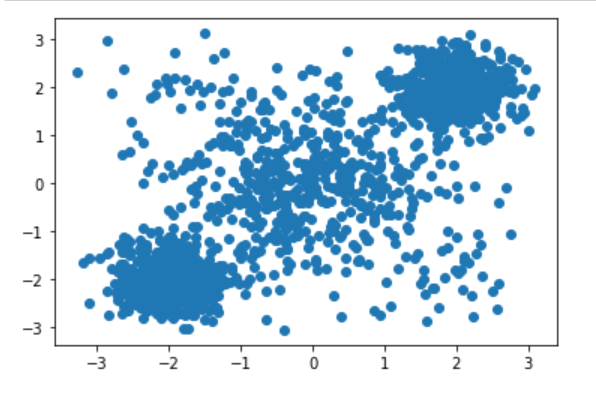

##### Dataset 2
![img2.PNG](img2.png)
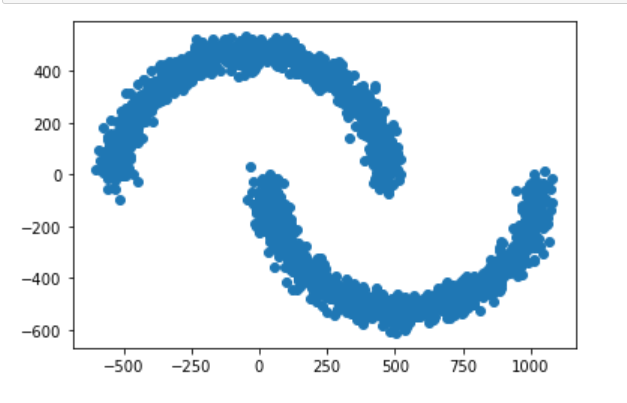

##### Dataset 3
![img3.PNG](img3.png)
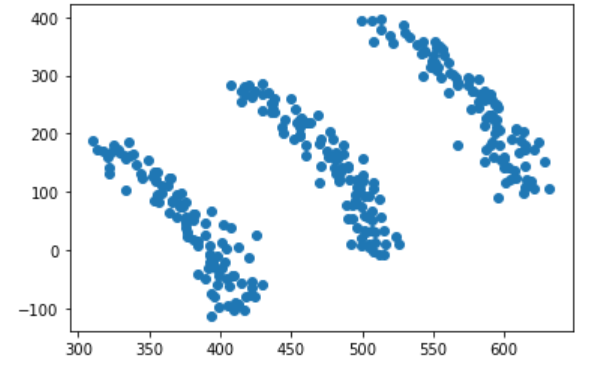

##### Dataset 4
![img4.PNG](./img4.png)
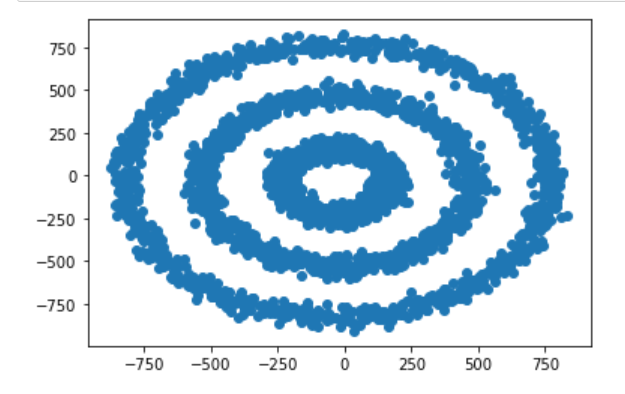

##### Dataset 5
![img5.PNG](./img5.png)
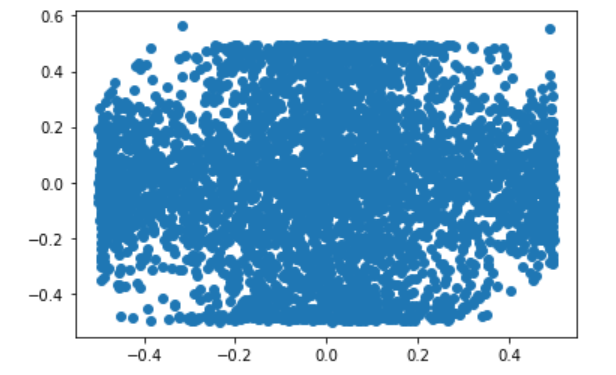

In [372]:
nodes = 1320

def create_circle(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

(1320, 2)


/tmp/ipykernel_229/251300867.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_half1.iloc[:, 0] -= 1
/tmp/ipykernel_229/251300867.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_half1.iloc[:, 1] -= 1
/tmp/ipykernel_229/251300867.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

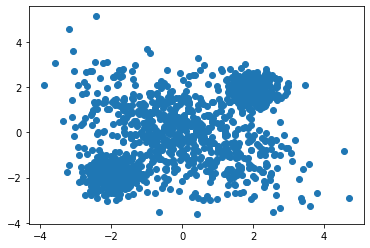

In [373]:
X, y = make_blobs(nodes // 2, cluster_std=1.5, centers=[[-3.5, -3.5], [3.5, 3.5]])
x_less_std = StandardScaler().fit_transform(X)
dataset1_y = y

X, y = datasets.make_regression(nodes // 2, n_features=1, noise=0.1)
x = StandardScaler().fit_transform(np.c_[X, y])

x += np.random.normal(0, 1, x.shape)

x[:, 0] = -x[:, 0]

df = pd.DataFrame(x_less_std)
df.sort_values(0, inplace=True)

df_half1 = df.iloc[:(df.shape[0] // 2), :]
df_half2 = df.iloc[(df.shape[0] // 2):, :]

df_half1.iloc[:, 0] -= 1
df_half1.iloc[:, 1] -= 1

df_half2.iloc[:, 0] += 1
df_half2.iloc[:, 1] += 1

df = pd.concat([df_half1, df_half2], ignore_index=True)
x_less_std = np.array(df)

x = np.vstack([x_less_std, x])
print(x.shape)

plt.scatter(x[:, 0], x[:, 1])
dataset1_x = x
dataset1_y = np.hstack([dataset1_y, np.full((nodes// 2), 2)])


(1320, 2)


/tmp/ipykernel_229/413823014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lower.iloc[:, 0] += 450
/tmp/ipykernel_229/413823014.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lower.iloc[:, 1] += 60
/tmp/ipykernel_229/413823014.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

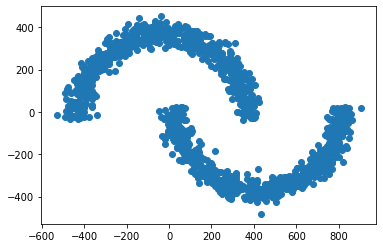

In [374]:
df = pd.DataFrame(create_circle(400, nodes))
df.sort_values(1, inplace=True)
df_lower = df.iloc[:(df.shape[0] // 2), :]
df_upper = df.iloc[(df.shape[0] // 2):, :]

df_lower.iloc[:, 0] += 450
df_lower.iloc[:, 1] += 60
df_lower[2] = np.full(df_lower.shape[0], 0)
df_upper[2] = np.full(df_upper.shape[0], 1)

df = pd.concat([df_lower, df_upper], ignore_index=True)
dataset2_y = np.array(df[2])

df.drop(2, axis=1, inplace=True)

print(df.shape)
plt.scatter(df[0], df[1])

dataset2_x = np.array(df)



(1038, 2)


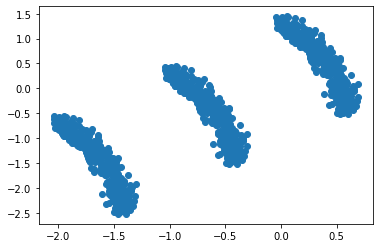

In [375]:
X, y = datasets.make_moons(math.ceil(nodes * 1.5), noise=0.05)
x = StandardScaler().fit_transform(X)

df = pd.DataFrame(x)

df.sort_values(1, inplace=True)

df = df.iloc[int(df.shape[0] // 3):, :]
y = y[int(y.shape[0] // 3):]

df.sort_values(0, inplace=True)

df = df.iloc[int(df.shape[0] // 1.65):, :]
y = y[int(y.shape[0] // 1.65):]

df = df.iloc[:int(df.shape[0] // 1.5), :]
y = y[:int(y.shape[0] // 1.5)]

df_part2 = df.copy(deep=True)
df_part3 = df.copy(deep=True)

df_part2.iloc[:, 0] -= 1
df_part2.iloc[:, 1] -= 1

df_part3.iloc[:, 0] -= 2
df_part3.iloc[:, 1] -= 2

df[2] = np.full(df.shape[0], 0)
df_part2[2] = np.full(df.shape[0], 1)
df_part3[2] = np.full(df.shape[0], 2)


df = pd.concat([df, df_part2, df_part3], ignore_index=True)
dataset3_y = np.array(df[2])

df.drop(2, axis=1, inplace=True)

print(df.shape)
plt.scatter(df[0], df[1])

dataset3_x = np.array(df)

(1320, 2)


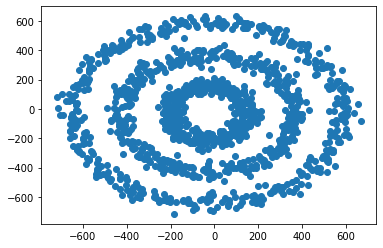

In [376]:
df = pd.DataFrame(create_circle(620, nodes // 3) + create_circle(400, nodes // 3) + create_circle(175, nodes // 3))
y = np.hstack([np.full(nodes // 3, 0), np.full(nodes // 3, 1), np.full(nodes // 3, 2)])

print(df.shape)
plt.scatter(df[0], df[1])

dataset4_x = np.array(df)
dataset4_y = y

(1131, 2)
(1131,)


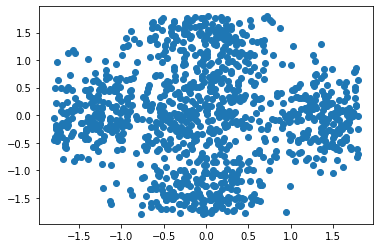

In [377]:
X, y = make_blobs(nodes, cluster_std=0.6, centers=[[0, 0], [-2, 0], [2, 0], [0, -2], [0, 2]])

x = StandardScaler().fit_transform(X)
df = pd.DataFrame(x)

df = df[(df < 1.8) & (df > -1.8)]

del_ind = []
for idx, i in enumerate(list(np.sum(df.isna(), axis=1))):
    if i != 0:
        del_ind.append(idx)

y = np.delete(y, del_ind)

df.dropna(inplace=True)

x = np.array(df)

print(x.shape)
print(y.shape)
plt.scatter(x[:, 0], x[:, 1])

dataset5_x = x
dataset5_y = y

# Task2 (Time+ Purity + Plot):
Nice work! Pat on you shoulder

#### Part(A)

Now lets use all of learnt functions from previous labs and apply each and every one of them on these 5 datsets.

1. Kmean
2. Aglomerative (single linkage)
3. Aglomerative (Avg linkage)
4. Aglomerative (Complete linkage)
5. Dbscan

You also need to print purity at the end of each plot & don't forget to report the time it takes by each algo in each

After each output state your conclusive sentence about it



### Note: There are total 25 outputs, each with 2 fields (time & purity). Displaying output with default colors would results in 0 for that section

In [378]:
def elbow_method(dataset):
    ''' Displays the graph of k= 1->10 on the given dataset. The optimal k value will be decided by observing the graph.'''
    dist = []
    for k in range(1, 11):
        model = KMeans(k)
        model.fit(dataset)
        dist.append(model.inertia_)

    plt.plot(list(range(1, 11)), dist)

def purity(actual, predicted):
    conf_mat = contingency_matrix(actual, predicted)
    return np.sum(np.amax(conf_mat, axis=0)) / np.sum(conf_mat)


91.8 ms ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Purity: 0.6946969696969697


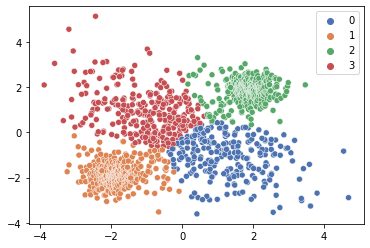

In [379]:
# K mean - case 1
# Code which output time, purity, distiniugable plot

#elbow_method(dataset1_x) # Optimal K=4

model = KMeans(4)
%timeit model.fit(dataset1_x)
sns.scatterplot(dataset1_x[:, 0], dataset1_x[:, 1], hue=model.labels_, palette='deep')
print("Purity:", purity(dataset1_y, model.labels_))

#The KMean clustering is accurate for the given dataset(68% purity)

86.8 ms ± 7.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Purity: 0.9757575757575757


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


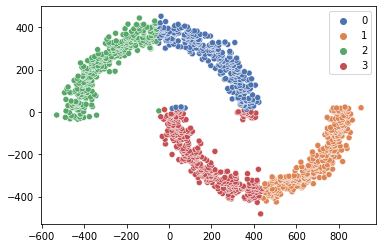

In [380]:
# K mean - case 2
# Code which output time, purity, distiniugable plot 

# elbow_method(dataset2_x) # Optimal K=4

model = KMeans(4)
%timeit model.fit(dataset2_x)
sns.scatterplot(dataset2_x[:, 0], dataset2_x[:, 1], hue=model.labels_, palette='deep')
print("Purity:", purity(dataset2_y, model.labels_))


#The KMeans clustering is accurate for this dataset(98% purity)

54.3 ms ± 21.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Purity: 1.0


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


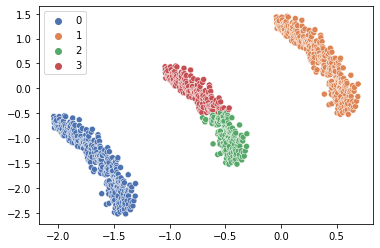

In [381]:
# K mean - case 3
# Code which output  time, purity, distiniugable plot 

# elbow_method(dataset3_x) # Optimal K=4

model = KMeans(4)
%timeit model.fit(dataset3_x)
sns.scatterplot(dataset3_x[:, 0], dataset3_x[:, 1], hue=model.labels_, palette='deep')
print("Purity:", purity(dataset3_y, model.labels_))

#The KMeans clustering is incredibly accurate offering a purity close to or equal to 1.

76 ms ± 21.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Purity: 0.3393939393939394


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


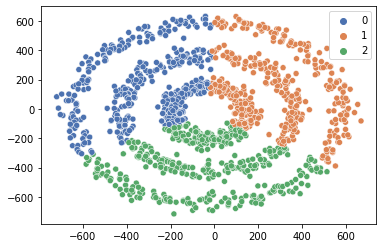

In [382]:
# K mean - case 4
# Code which output time, purity, distiniugable plot

# elbow_method(dataset4_x) # Optimal K=3

model = KMeans(3)
%timeit model.fit(dataset4_x)
sns.scatterplot(dataset4_x[:, 0], dataset4_x[:, 1], hue=model.labels_, palette='deep')
print("Purity:", purity(dataset4_y, model.labels_))


#The KMeans clusterign on this dataset is incredibly weak with only 34% purity.

78.6 ms ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Purity: 0.7515473032714411


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


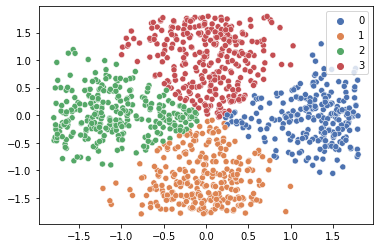

In [383]:
# K mean - case 5
# Code which output time, purity, distiniugable plot 

# elbow_method(dataset5_x) # Optimal K=4

model = KMeans(4)
%timeit model.fit(dataset5_x)
sns.scatterplot(dataset5_x[:, 0], dataset5_x[:, 1], hue=model.labels_, palette='deep')
print("Purity:", purity(dataset5_y, model.labels_))

#The Kmeans is relatively accurate with 75% purity.

8.83 ms ± 723 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.5


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


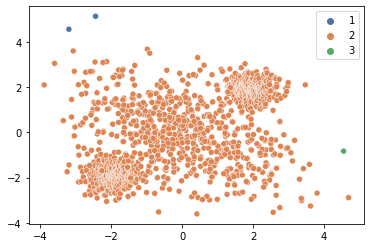

In [384]:
# Aglomerative 1 - case 1
# Code which output time, purity, distinguishable plot

%timeit linkage(dataset1_x, method='single')
dist_mat = linkage(dataset1_x, method='single')

clusters = fcluster(dist_mat, 3, criterion='maxclust')

sns.scatterplot(dataset1_x[:, 0], dataset1_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset1_y, clusters))

#By observing the graph, the single linkage method has developed incredibly poor clustering, even if purity states 0.5

7.27 ms ± 605 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 1.0


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


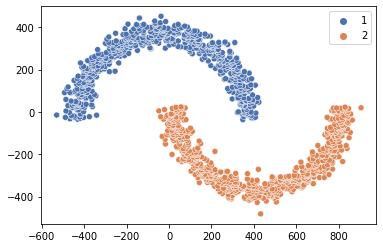

In [385]:
# Aglomerative 1 - case 2
# Code whihc ourput time, purity, distinguishable plot 

%timeit linkage(dataset2_x, method='single')
dist_mat = linkage(dataset2_x, method='single')

clusters = fcluster(dist_mat, 2, criterion='maxclust')

sns.scatterplot(dataset2_x[:, 0], dataset2_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset2_y, clusters))


#Single linkage method has developed an incredibly accurate cluster set for this dataset.

4.09 ms ± 711 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 1.0


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


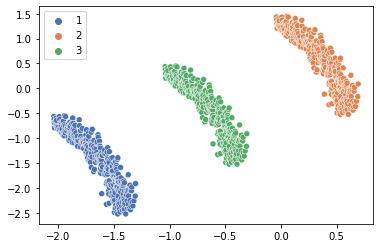

In [386]:
# Aglomerative 1 - case 3
# Code whihc ourput time, purity, distinguishable plot

%timeit linkage(dataset3_x, method='single')
dist_mat = linkage(dataset3_x, method='single')

clusters = fcluster(dist_mat, 3, criterion='maxclust')

sns.scatterplot(dataset3_x[:, 0], dataset3_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset3_y, clusters))


#The clusters are accurate using single linkage method

6.43 ms ± 623 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.6666666666666666


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


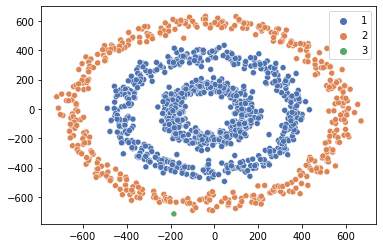

In [387]:
# Aglomerative 1 - case 4
# Code whihc ourput time, purity, distinguishable plot

%timeit linkage(dataset4_x, method='single')
dist_mat = linkage(dataset4_x, method='single')

clusters = fcluster(dist_mat, 3, criterion='maxclust')

sns.scatterplot(dataset4_x[:, 0], dataset4_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset4_y, clusters))


#The clusters fail to identify the inner circle as a separate cluster, hence purity dropped and the clustering is poor.

7.45 ms ± 596 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.23784261715296198


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


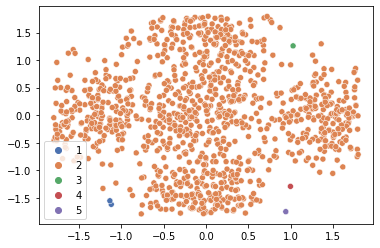

In [388]:
# Aglomerative 1 - case 5
# Code whihc ourput time, purity, distinguishable plot 

%timeit linkage(dataset5_x, method='single')
dist_mat = linkage(dataset5_x, method='single')

clusters = fcluster(dist_mat, 5, criterion='maxclust')

sns.scatterplot(dataset5_x[:, 0], dataset5_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset5_y, clusters))

#The clustering is incredibly poor for this dataset with only 24% purity.

21.3 ms ± 5.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Purity: 0.6143939393939394


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


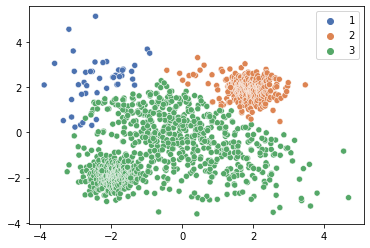

In [389]:
# Aglomerative 2 - case 1
# Code which output time, purity, distinguishable plot 

%timeit linkage(dataset1_x, method='average')
dist_mat = linkage(dataset1_x, method='average')

clusters = fcluster(dist_mat, 3, criterion='maxclust')

sns.scatterplot(dataset1_x[:, 0], dataset1_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset1_y, clusters))


#Decent clustering but still not improved with purity 0.5

15.2 ms ± 178 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.8287878787878787


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


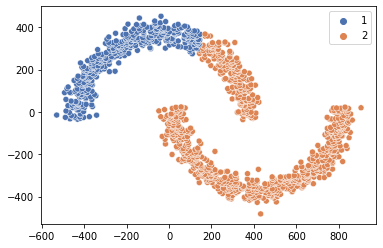

In [390]:
# Aglomerative 2 - case 2
# Code which output time, purity, distinguishable plot 

%timeit linkage(dataset2_x, method='average')
dist_mat = linkage(dataset2_x, method='average')

clusters = fcluster(dist_mat, 2, criterion='maxclust')

sns.scatterplot(dataset2_x[:, 0], dataset2_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset2_y, clusters))

#Decent clusters but can be improved with 83% purity.

8.73 ms ± 486 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 1.0


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


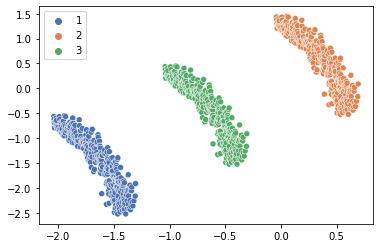

In [391]:
# Aglomerative 2 - case 3
# Code which output time, purity, distinguishable plot 

%timeit linkage(dataset3_x, method='average')
dist_mat = linkage(dataset3_x, method='average')

clusters = fcluster(dist_mat, 3, criterion='maxclust')

sns.scatterplot(dataset3_x[:, 0], dataset3_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset3_y, clusters))

#Perfect clusters for this dataset.

17.7 ms ± 548 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.5416666666666666


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


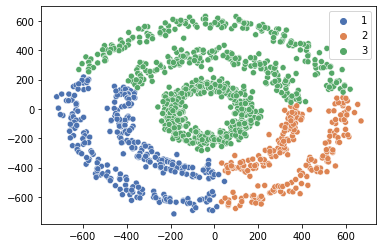

In [392]:
# Aglomerative 2 - case 4
# Code which output time, purity, distinguishable plot

%timeit linkage(dataset4_x, method='average')
dist_mat = linkage(dataset4_x, method='average')

clusters = fcluster(dist_mat, 3, criterion='maxclust')

sns.scatterplot(dataset4_x[:, 0], dataset4_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset4_y, clusters))
  
#Average clustering with 51%+ purity.

16.3 ms ± 710 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.9000884173297966


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


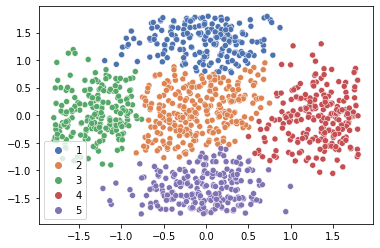

In [393]:
# Aglomerative 2 - case 5
# Code which output time, purity, distinguishable plot 

%timeit linkage(dataset5_x, method='average')
dist_mat = linkage(dataset5_x, method='average')

clusters = fcluster(dist_mat, 5, criterion='maxclust')

sns.scatterplot(dataset5_x[:, 0], dataset5_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset5_y, clusters))

#Good clustering for a dataset with a lot of noise with 88%+ purity.

17.5 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.5174242424242425


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


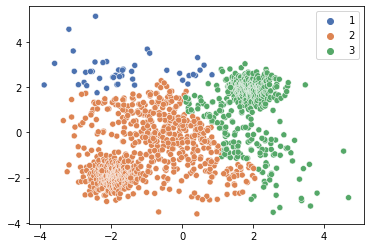

In [394]:
# Aglomerative 3 - case 1
# Code which output time, purity, distinguishable plot 

%timeit linkage(dataset1_x, method='complete')
dist_mat = linkage(dataset1_x, method='complete')

clusters = fcluster(dist_mat, 3, criterion='maxclust')

sns.scatterplot(dataset1_x[:, 0], dataset1_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset1_y, clusters))


#Average clustering with 50% purity.

15.5 ms ± 952 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.9045454545454545


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


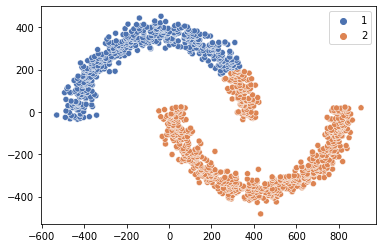

In [395]:
# Aglomerative 3 - case 2
# Code whihc ourput time, purity, distinguishable plot 

%timeit linkage(dataset2_x, method='complete')
dist_mat = linkage(dataset2_x, method='complete')

clusters = fcluster(dist_mat, 2, criterion='maxclust')

sns.scatterplot(dataset2_x[:, 0], dataset2_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset2_y, clusters))



#Good clustering for this dataset with 85%+ purity.

9.43 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.7398843930635838


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


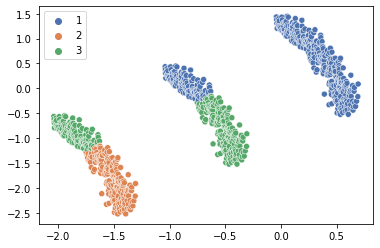

In [396]:
# Aglomerative 3 - case 3
# Code which output time, purity, distinguishable plot 

%timeit linkage(dataset3_x, method='complete')
dist_mat = linkage(dataset3_x, method='complete')

clusters = fcluster(dist_mat, 3, criterion='maxclust')

sns.scatterplot(dataset3_x[:, 0], dataset3_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset3_y, clusters))



#Poorer than other methods with only 72%+ purity.

20.4 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.45227272727272727


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


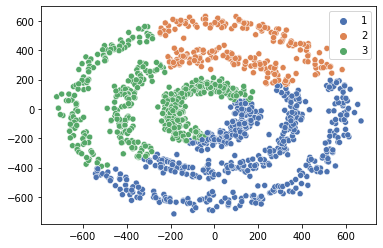

In [397]:
# Aglomerative 3 - case 4
# Code which output time, purity, distinguishable plot 

%timeit linkage(dataset4_x, method='complete')
dist_mat = linkage(dataset4_x, method='complete')

clusters = fcluster(dist_mat, 3, criterion='maxclust')

sns.scatterplot(dataset4_x[:, 0], dataset4_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset4_y, clusters))



#Average clustering for this dataset with only around 50% purity.

18.3 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Purity: 0.7975243147656941


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


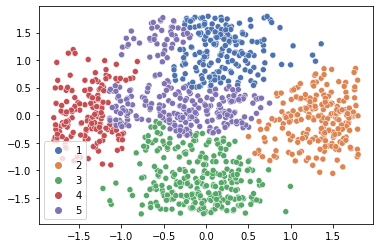

In [398]:
# Aglomerative 3 - case 5
# Code which output time, purity, distinguishable plot 

%timeit linkage(dataset5_x, method='complete')
dist_mat = linkage(dataset5_x, method='complete')

clusters = fcluster(dist_mat, 5, criterion='maxclust')

sns.scatterplot(dataset5_x[:, 0], dataset5_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset5_y, clusters))


#The clusters made are decent but can be improved, these are not as good as average linkage with only 68% purity.

In [399]:
min_neighbors = 2 * 2 # 2 dimensions and its dim*2 hence 4

In [400]:
def determine_epsilon(dataset):
    '''Code from lab that generates a graph to check optimal epsilon.'''
    neigh = NearestNeighbors(n_neighbors=7)
    nbrs = neigh.fit(dataset)
    distances, indices = nbrs.kneighbors(dataset)
    distances = np.sort(distances, axis=0)
    distances = [np.average(x) for  x in distances ]
    plt.plot(distances)

4.87 ms ± 618 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.5


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


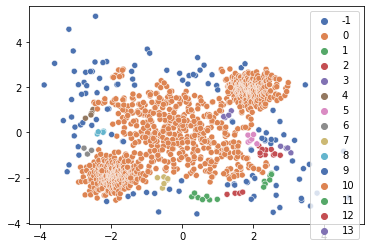

In [401]:
# Dbscan - case 1
# Code which output time, purity, distinguishable plot

# determine_epsilon(dataset1_x) # ep = 0.25

eps = 0.25

%timeit DBSCAN(eps=eps, min_samples=min_neighbors).fit(dataset1_x)
clusters = DBSCAN(eps=eps, min_samples=min_neighbors).fit(dataset1_x)
sns.scatterplot(dataset1_x[:, 0], dataset1_x[:, 1], hue=clusters.labels_, palette='deep')
print("Purity:", purity(dataset1_y, clusters.labels_))


#The clustering is average with purity 50%.

4.15 ms ± 525 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.9659090909090909


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


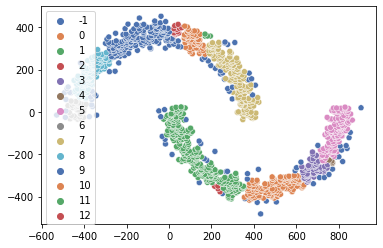

In [402]:
# Dbscan - case 2
# Code which output time, purity, distinguishable plot

# determine_epsilon(dataset2_x) # ep = 20

eps = 20

%timeit DBSCAN(eps=eps, min_samples=min_neighbors).fit(dataset2_x)
clusters = DBSCAN(eps=eps, min_samples=min_neighbors).fit(dataset2_x)
sns.scatterplot(dataset2_x[:, 0], dataset2_x[:, 1], hue=clusters.labels_, palette='deep')
print("Purity:", purity(dataset2_y, clusters.labels_))


#The clustering has a high purity of 96% with decents clusters. noise is also identified.

3.57 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.9826589595375722


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


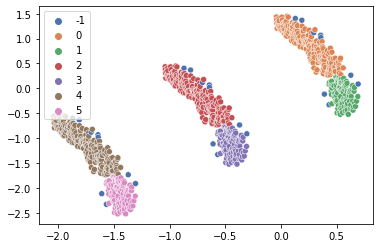

In [403]:
# Dbscan - case 3
# Code which output time, purity, distinguishable plot

# determine_epsilon(dataset3_x) # ep = 0.06

eps = 0.06

%timeit DBSCAN(eps=eps, min_samples=min_neighbors).fit(dataset3_x)
clusters = DBSCAN(eps=eps, min_samples=min_neighbors).fit(dataset3_x)
sns.scatterplot(dataset3_x[:, 0], dataset3_x[:, 1], hue=clusters.labels_, palette='deep')
print("Purity:", purity(dataset3_y, clusters.labels_))


#Purity is high at 97% and the clusters made are good with noise being identified reliably.

4.33 ms ± 428 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.9916666666666667


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


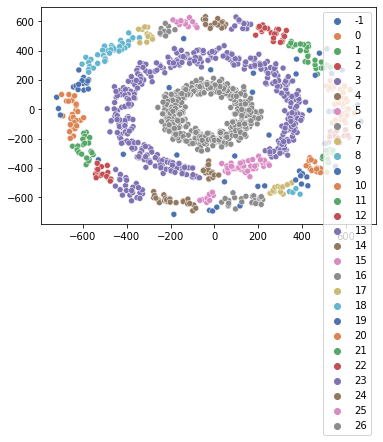

In [404]:
# Dbscan - case 4
# Code which output time, purity, distinguishable plot 

# determine_epsilon(dataset4_x) # ep = 40

eps = 40

%timeit DBSCAN(eps=eps, min_samples=min_neighbors).fit(dataset4_x)
clusters = DBSCAN(eps=eps, min_samples=min_neighbors).fit_predict(dataset4_x)
sns.scatterplot(dataset4_x[:, 0], dataset4_x[:, 1], hue=clusters, palette='deep')
print("Purity:", purity(dataset4_y, clusters))


#The clusters were reliably identified with 98% purity.

4.04 ms ± 378 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Purity: 0.5764809902740937


/home/shahzeb/Scripts/bigdata_sem4/virtualenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


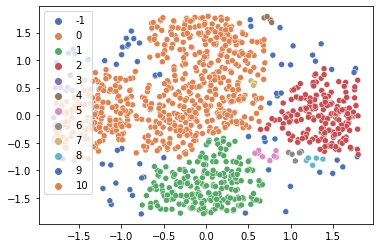

In [405]:
# Dbscan - case 5
# Code which output time, purity, distinguishable plot

# determine_epsilon(dataset5_x) # ep = 0.13

eps = 0.13

%timeit DBSCAN(eps=eps, min_samples=min_neighbors).fit(dataset5_x)
clusters = DBSCAN(eps=eps, min_samples=min_neighbors).fit(dataset5_x)
sns.scatterplot(dataset5_x[:, 0], dataset5_x[:, 1], hue=clusters.labels_, palette='deep')
print("Purity:", purity(dataset5_y, clusters.labels_))


#The clustering method DBSCAN failed to accurately forming clusters on the given dataset as compared to other clustering methods.

In [ ]:
# Happy Ramazan :)